# Name: Simon Eeds

# Student ID: 110065422

# GitHub ID: Seamonster541

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization

2nd Part - Kaggle Rank </br>
3rd Part - Kaggle Competition explanation

### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

![pic00](pics/pic0.png)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic00.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vect = CountVectorizer()

def Top30_words(data):
    # Fit and transform training data
    counts = count_vect.fit_transform(data.text)

    # Get feature names
    feature_names = count_vect.get_feature_names_out()

    # Array place holder to store sum count for df
    term_freq = []

    # Loop to add the total count of each term into the array
    for j in range(0,counts.shape[1]):
        term_freq.append(sum(counts[:,j].toarray()))

    # set term freq to help make the words easier to read
    term_freq = np.asarray(counts.sum(axis=0))[0]
    
    #create a dataframe that only has the words and its frequencies
    word_freq_df = pd.DataFrame({'word': feature_names, 'freq': term_freq})
    word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)
    top_30 = word_freq_df.head(30)
    print(top_30)

    #bar chart for top 30 frequency words
    plt.figure(figsize=(15, 8))
    g1 = sns.barplot(x=top_30.word, y=top_30.freq)
    g1.set_xticklabels(top_30.word, rotation=90)
    plt.show()

### With Stop Words

       word  freq
8930    the  1736
9119     to  1289
537     and   955
10051   you   796
6371     of   793
4546     is   787
4571     it   717
4383     in   626
8924   that   537
5957     my   535
3391    for   446
6422     on   390
976      be   383
5577     me   380
9020   this   350
8264     so   328
4009   have   312
6235    not   303
4798   just   301
1448    but   293
9872   with   288
757      at   269
1504    can   257
464     all   243
5186   like   243
670     are   231
10059  your   229
9678    was   228
9782   when   226
4319     if   216


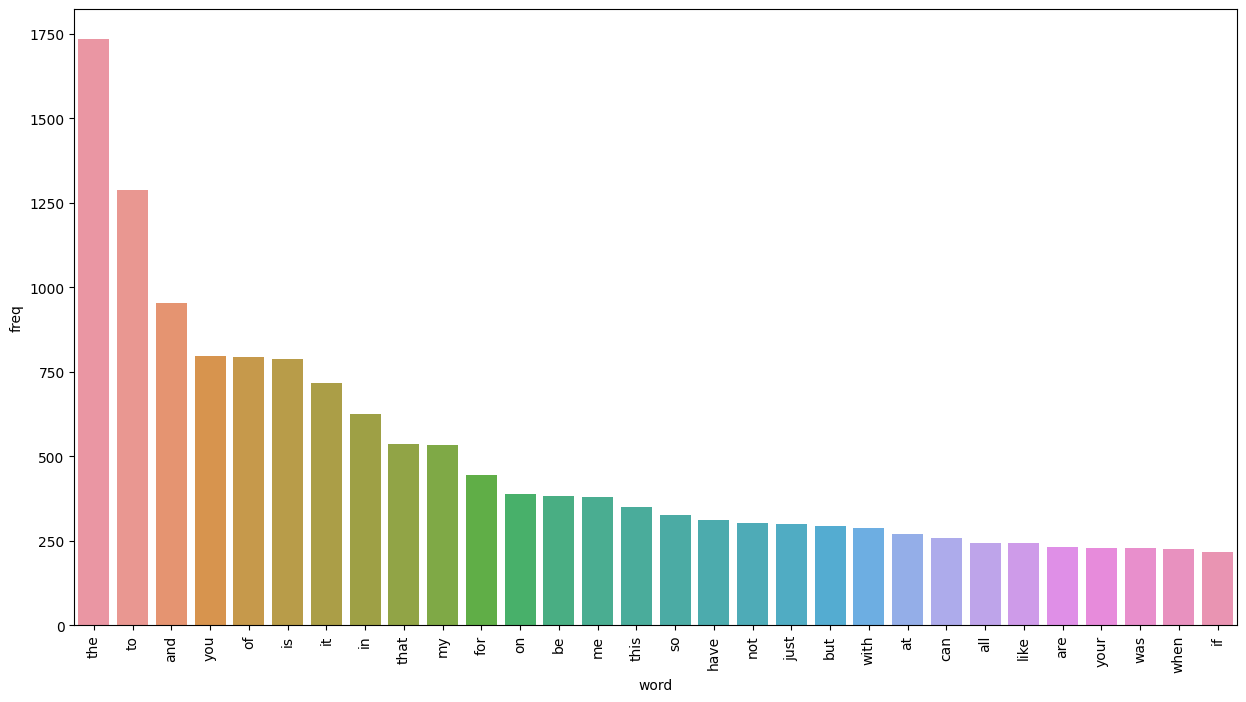

In [7]:
Top30_words(train_df)

      word  freq
1687   the   153
1739    to   138
99     and    92
1240    of    83
909     it    83
1938   you    82
903     is    77
867     in    69
655    for    57
1686  that    55
1165    my    52
1257    on    46
185     be    40
1088    me    36
1567    so    34
1843   was    34
290    can    32
785   have    30
82     all    30
150     at    30
934   just    29
1893  with    29
133    are    29
705    get    26
277    but    26
1212   not    24
1804    up    24
1009  like    24
1940  your    24
1712  this    24


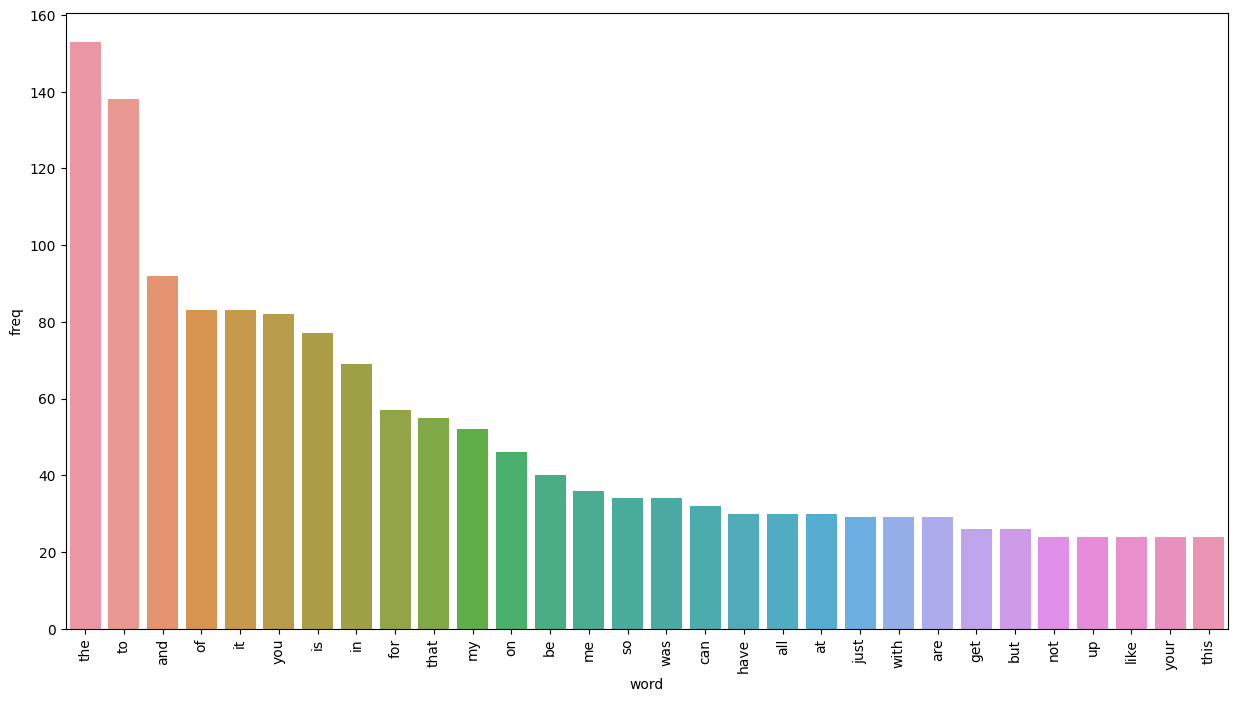

In [8]:
Top30_words(test_df)

### Without stop words.

In [9]:
count_vect = CountVectorizer(stop_words='english')

         word  freq
4677     just   301
5061     like   243
2568      don   207
509       amp   182
6535   people   120
8865     time   118
2260      day   114
4845     know   112
5207     love   111
3650     good   111
9451    watch    98
8801    think    98
5311     make    92
9272       ve    91
8900    today    90
3876    happy    86
9423     want    83
3673      got    81
5196     lost    80
5047     life    78
5114     live    78
7160   really    78
5911     need    76
5127       ll    76
3121     feel    75
5006      let    75
9464      way    75
492   amazing    74
3638    going    69
8259    start    66


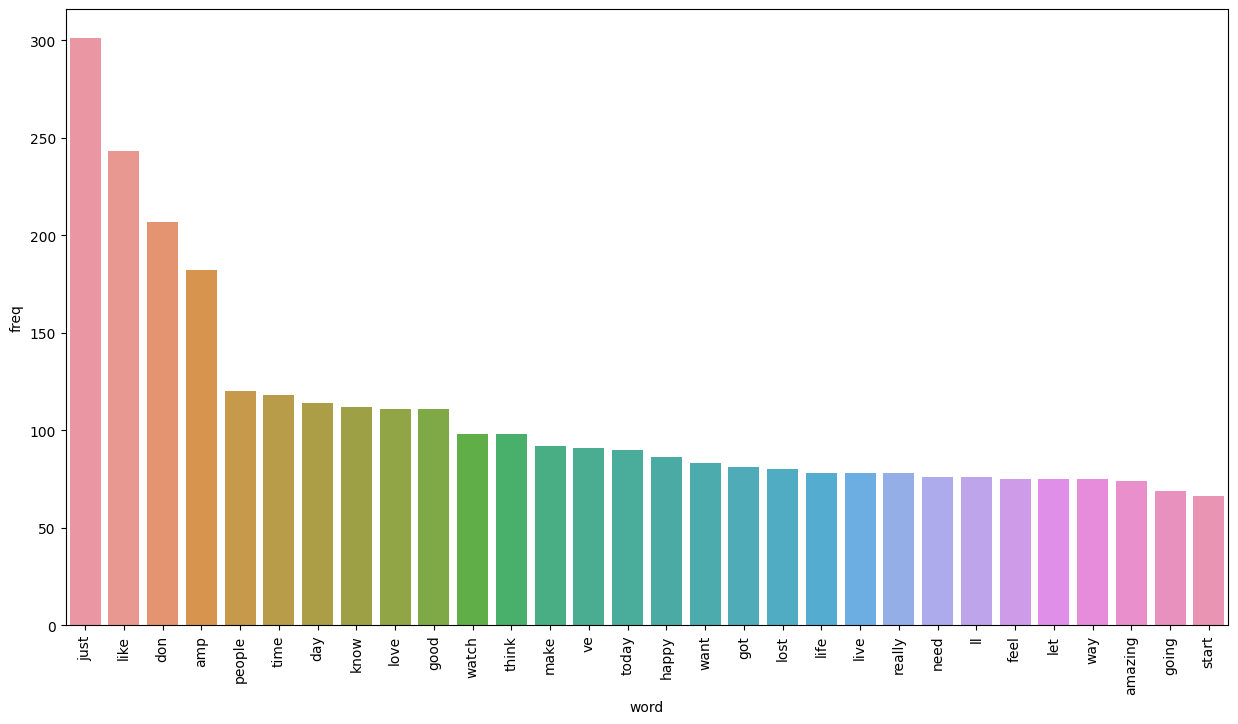

In [10]:
Top30_words(train_df)

          word  freq
855       just    29
928       like    24
460        don    22
1194    people    15
392        day    14
965       love    13
1682      want    12
985       make    12
1566     think    11
84         amp    11
987        man    10
143      awful    10
879       know     9
89       anger     9
1294    really     9
1093       new     9
924       life     9
1587      time     8
944         ll     8
1565    things     8
709      happy     8
568       feel     8
428       didn     8
1160  optimism     7
1593     today     7
956       look     7
940     little     7
1352       sad     7
669       good     7
830     issues     7


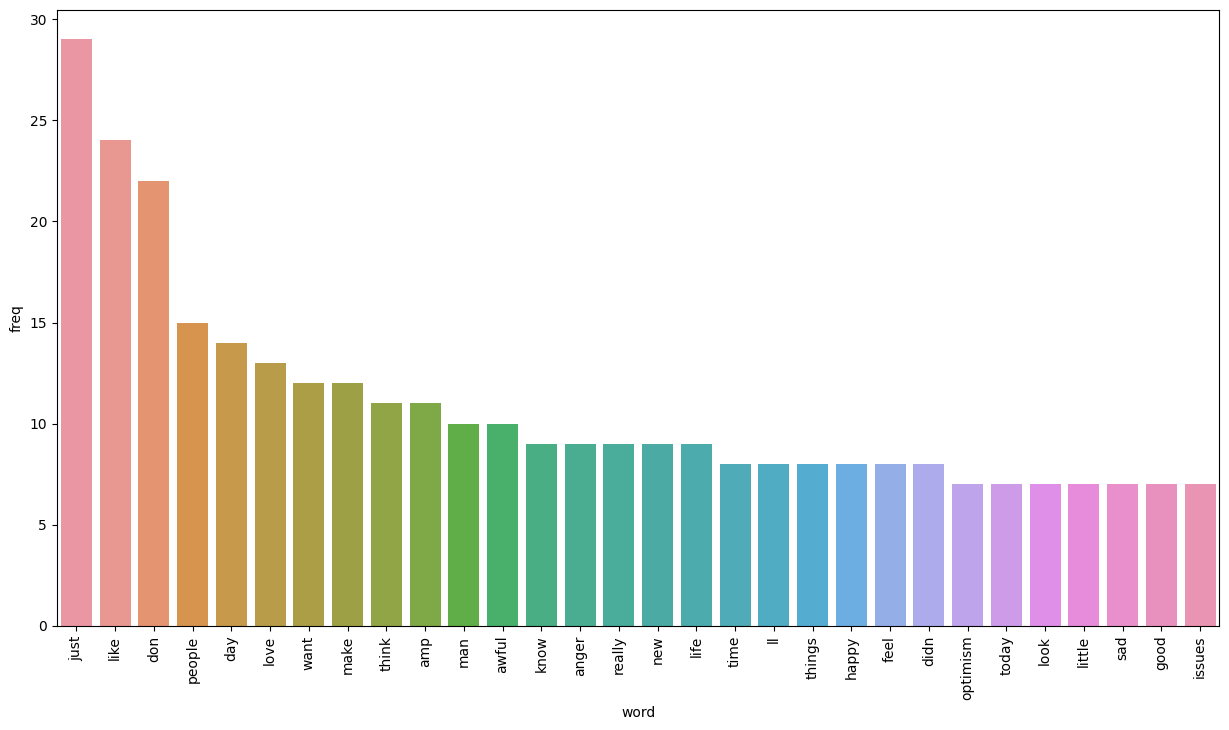

In [11]:
Top30_words(test_df)

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [12]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [13]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [14]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

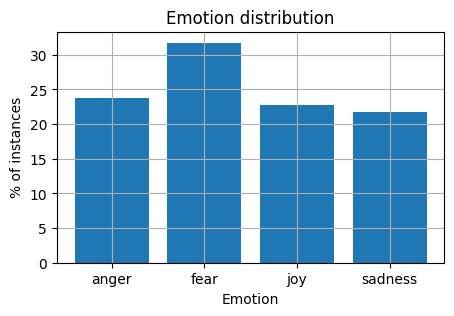

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [18]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [19]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [20]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [21]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [23]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [24]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [25]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\se_ee\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [26]:
train_data_BOW_features_500.toarray()

array([[1, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [28]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [29]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Sets max features to 1000 and uses a tokenize
TfidVect_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

def Vect1000(data):
    TfidVect_1000.fit(data['text'])
    
    data_Tfid_features_1000 = TfidVect_1000.transform(data['text'])

    ## check dimension
    print(data_Tfid_features_1000.shape)
    
    #data_Tfid_features_1000.toarray()
    
    # observe some feature names
    feature_names_1000 = TfidVect_1000.get_feature_names_out()
    print(feature_names_1000[100:110])

### With Tokenize(nlk)

In [30]:
Vect1000(train_df)

(3613, 1000)
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


In [31]:
Vect1000(test_df)

(347, 1000)
['appreciated' 'arch' 'are' 'arms' 'around' 'as' 'asked' 'assistance' 'at'
 'attempt']


### Without Tokenize

In [32]:
TfidVect_1000 = TfidfVectorizer(max_features=1000)

In [33]:
Vect1000(train_df)

(3613, 1000)
['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


In [34]:
Vect1000(test_df)

(347, 1000)
['bout' 'box' 'boy' 'brace' 'braved' 'bread' 'breezy' 'brewing' 'brian'
 'brilliant']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [36]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'anger', 'sadness', 'joy', 'anger', 'fear',
       'anger', 'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [37]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [38]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [39]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [40]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

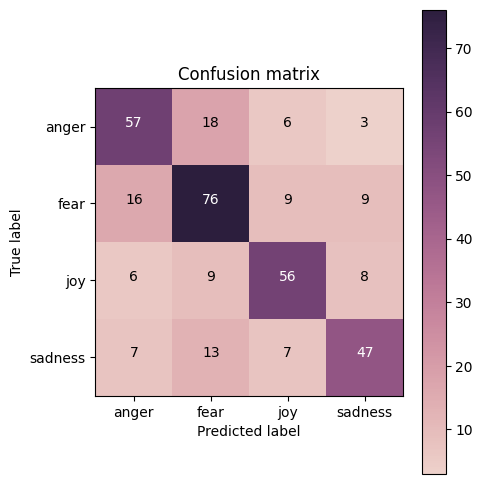

In [41]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
According to the classification report we can say that model performed decently:<br> 
precision score of anger: 0.66, fear: 0.66, joy: 0.72, sadness: 0.70.<br>
f1 score of anger: 0.67, fear: 0.67, joy: 0.70, sadness: 0.67.<br>
overall accuracy of 0.68.<br>

While this isn't super amazing it is still reasonable and balanced.<br>
As for the actual numbers for what the model predicted correctly (true positive):<br>
anger: 57, fear: 76, joy: 56, sadness: 47<br>

total occurance of each label (predicted):<br>
anger: 86, fear: 116, joy: 78, sadness: 67<br>

total occurance of each label (true):<br>
anger: 84, fear: 110, joy: 79, sadness: 74<br>

We can say fear has the highest number of true postives and sadness has the lowest. But that can be misleading since fear has the most occurance and sadness has least occurance, so that on percentage wise they are similar when it comes to f1 score. We can also say joy did the best in terms of predicting correctly in comparison of true label and predicted (correctly), based on the ration of the two values. Another thing we can say that in terms of total predicted labels: anger, fear were higher than the true label, while joy, sadness were predicated lower than the actual labels. Usually different number from prediction and true means it failed to correctly label.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [42]:
# Answer here

from sklearn.naive_bayes import MultinomialNB

# Use Naive Bayes classifier to fit the data on
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict
y_train_pred = naive_bayes_classifier.predict(X_train)
y_test_pred = naive_bayes_classifier.predict(X_test)

# Pred result
y_test_pred[:10]

array(['anger', 'fear', 'fear', 'sadness', 'joy', 'anger', 'fear',
       'anger', 'fear', 'anger'], dtype='<U7')

In [43]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


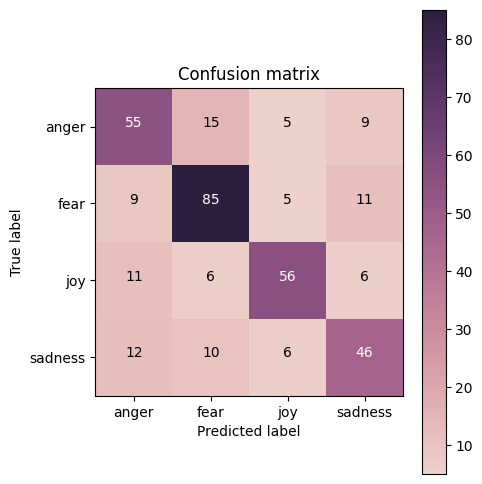

In [44]:
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Results

In [45]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [46]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
###### note
Both models were train on BOW500 - limit to 500 words

#### Overall accuracy report: <br>
NB training accuracy was a 0.79, which is 0.2 lower than DT 0.99 accuracy. NB test accuracy was 0.7, which is 0.02 higher than DT 0.70. <br>
DT higher accuracy on training data means that might be better at this range (500) of data when it comes to capturing complex patterns, it could also mean there is an overfitting issue with the training data on DT model <br>
NB higher test accuracy suggest it is better at generalizing the unseen data. NB could also be better for larger data sets as it scales better than DT (more efficient).<br><br>
#### Classification report: <br>
NB precision for anger and sandess were lower with 0.63 and 0.64 compared to DT precision for anger and sadness, 0.66 and 0.7. This could be due to NB predicting more incorrectly (false postives)<br>
BN precision for fear and joy were higher at 0.73 abd 0.78, while DT had 0.66 and 0.72. This means NB has better prediction while DT has more false postives <br> <br>
NB f1 score for anger and sadnness were lower with 0.64 and 0.63. DT f1 score was 0.67 and 0.67. This means DT has better precision and recall for these classes. <br>
NB f1 score for fear and joy were higher with 0.75 and 0.74 while Dt had 0.67 and 0.71. This means NB has better precision and recall for these classes. <br>

#### pros and cons for NB & DT comparison
NB: NB is fairly simple and fast algorithm is it could generalize a little better in some cases, especially when the data set becomes larger. However it isn't great at handleing more complex data set and attributes that lack independence.

DT: It is better at interpretability, and can handles both numerical and categorical data. It is also better to handle more complex data compared NB, especially if there is no linear relationship. It is great at feature importance. However it has overfitting problems, which scale with increase data set size. It also has issues with imbalanced data and noise. This is more a double edge sword where it could be good or bad, which it is a greedy algorithm.


### Below tests PCA

### Trying other things for exercise (5)

In [47]:
# PCA and scalar
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# Data (x,y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [49]:
# Convert sparse matrix to dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [50]:
# Apply PCA
pca = PCA(n_components=500) 
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

In [51]:
# Standardize the PCA-transformed features
scaler = StandardScaler()
X_train_pca_std = scaler.fit_transform(X_train_pca)
X_test_pca_std = scaler.transform(X_test_pca)

In [52]:
# Build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

# Training!
DT_model = DT_model.fit(X_train_pca_std, y_train)

## predict!
y_train_pred = DT_model.predict(X_train_pca_std)
y_test_pred = DT_model.predict(X_test_pca_std)

In [53]:
# Evaluate
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.35
              precision    recall  f1-score   support

       anger       0.32      0.35      0.33        84
        fear       0.43      0.42      0.42       110
         joy       0.32      0.29      0.30        79
     sadness       0.32      0.34      0.33        74

    accuracy                           0.35       347
   macro avg       0.35      0.35      0.35       347
weighted avg       0.36      0.35      0.35       347



### Trying Logistic Regression model

In [54]:
from sklearn.linear_model import LogisticRegression

# Data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Build model
LR_model = LogisticRegression(random_state=1)
LR_model = LR_model.fit(X_train, y_train)

# Prediction
y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

# Evaluate
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('Training Accuracy: {:.2f}'.format(acc_train))
print('Testing Accuracy: {:.2f}'.format(acc_test))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

Training Accuracy: 0.86
Testing Accuracy: 0.69
              precision    recall  f1-score   support

       anger       0.62      0.67      0.64        84
        fear       0.71      0.76      0.73       110
         joy       0.81      0.72      0.77        79
     sadness       0.63      0.58      0.61        74

    accuracy                           0.69       347
   macro avg       0.69      0.68      0.69       347
weighted avg       0.69      0.69      0.69       347



C:\Users\se_ee\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# With PCA and Scalar
# Apply PCA
pca = PCA(n_components=500) 
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

# Standardize the PCA-transformed features
scaler = StandardScaler()
X_train_pca_std = scaler.fit_transform(X_train_pca)
X_test_pca_std = scaler.transform(X_test_pca)

# Prediction
y_train_pred = LR_model.predict(X_train_pca_std)
y_test_pred = LR_model.predict(X_test_pca_std)

# Evaluate
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('Training Accuracy: {:.2f}'.format(acc_train))
print('Testing Accuracy: {:.2f}'.format(acc_test))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

Training Accuracy: 0.26
Testing Accuracy: 0.27
              precision    recall  f1-score   support

       anger       0.28      0.30      0.29        84
        fear       0.27      0.19      0.22       110
         joy       0.24      0.28      0.26        79
     sadness       0.27      0.32      0.29        74

    accuracy                           0.27       347
   macro avg       0.27      0.27      0.27       347
weighted avg       0.27      0.27      0.26       347



### Conclusion for extra things
With the current feature engineering with BOW, PCA and Scalar negatively impact the original model and the model using Logistic Regression.

Logistic Regression (without PCA and Scalar) is roughly the same for evaluation for test data, but for train is it is lower.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [56]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [57]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2870    sadness
523       anger
417       anger
2930    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


C:\Users\se_ee\AppData\Local\Temp\ipykernel_11096\393062722.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


### 6.3 Build model

In [58]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [59]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [60]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\se_ee\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 3ms/step - loss: 1.3253 - accuracy: 0.3634 - val_loss: 1.2511 - val_accuracy: 0.4755
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9881 - accuracy: 0.6294 - val_loss: 0.9042 - val_accuracy: 0.6974
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7916 - val_loss: 0.7777 - val_accuracy: 0.7233
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8497 - val_loss: 0.7912 - val_accuracy: 0.6945
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8835 - val_loss: 0.8299 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.9048 - val_loss: 0.8897 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.9250 - val_loss: 0.9664 - val_accuracy: 0.6888
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [61]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 0s/step


array([[9.5647031e-01, 4.2848426e-04, 4.2116665e-07, 4.3100763e-02],
       [3.1281397e-02, 8.8075608e-01, 9.1261194e-05, 8.7871291e-02],
       [4.8158350e-03, 5.0257587e-01, 3.5868629e-03, 4.8902145e-01],
       [7.6047501e-05, 3.2058933e-03, 1.4203927e-06, 9.9671656e-01],
       [2.4297538e-04, 1.4882583e-07, 9.9966466e-01, 9.2179347e-05]],
      dtype=float32)

In [62]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'fear', 'sadness', 'joy'], dtype=object)

In [63]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.64


In [64]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.363410  1.325294      0.475504  1.251071
1       1  0.629394  0.988096      0.697406  0.904240
2       2  0.791586  0.588260      0.723343  0.777696
3       3  0.849709  0.409774      0.694524  0.791196
4       4  0.883476  0.325111      0.694524  0.829909
5       5  0.904788  0.265843      0.700288  0.889707
6       6  0.924993  0.220259      0.688761  0.966400
7       7  0.940769  0.182196      0.706052  1.044200
8       8  0.952394  0.156908      0.685879  1.119215
9       9  0.960697  0.138002      0.674352  1.175035
10     10  0.966787  0.115576      0.668588  1.224498
11     11  0.970385  0.108489      0.674352  1.254381
12     12  0.971769  0.097657      0.654179  1.386895
13     13  0.972045  0.090565      0.665706  1.381283
14     14  0.972045  0.087007      0.645533  1.410793
15     15  0.972599  0.083698      0.651297  1.409452
16     16  0.975090  0.075614      0.657061  1.457458
17     17  0.975644  0.081739      0.642651  1.501652
18     18  0.975920  0.071782      0.639769  1.534266
19     19  0.977581  0.065228      0.648415  1.535394
20     20  0.977858  0.064943      0.654179  1.552295
21     21  0.978135  0.060201      0.651297  1.596470
22     22  0.977027  0.064164      0.642651  1.615636
23     23  0.978411  0.061074      0.651297  1.614399
24     24  0.977581  0.059207      0.639769  1.662042

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

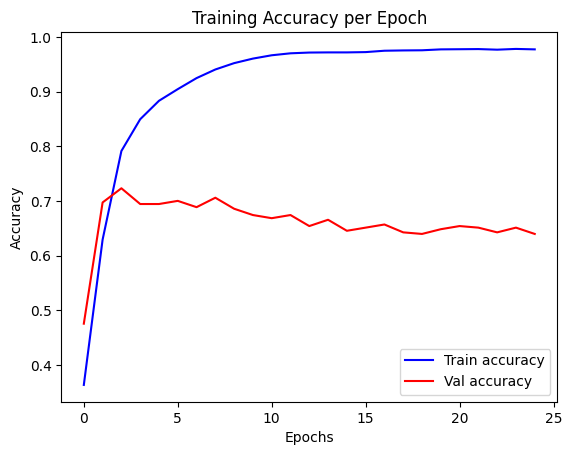

In [65]:
# Answer here
# Plot Training Accuracy per Epoch
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.show()

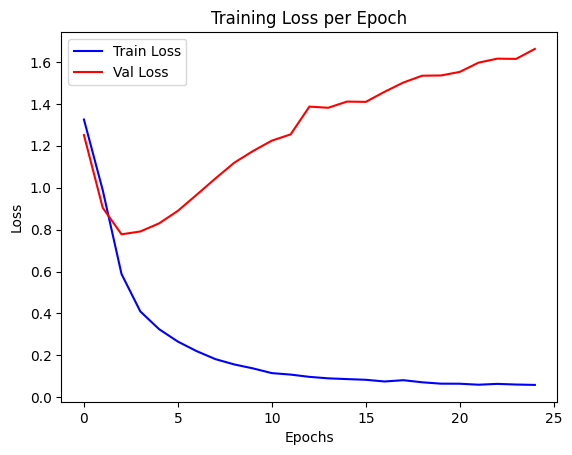

In [66]:
# Plotting Training Loss per Epoc
plt.plot(training_log['epoch'], training_log['loss'], label='Train Loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val Loss', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.show()

# Interpretation
### Accuracy
Going off by both the graph and the given table with values. We can state that training accuracy started lower, at 0.366.., but increased with Epoch up to 0.976.. while Val train started at 0.461.. and quickly tapered off at 0.65.. to 0.7.. range right after the first epoch, fluctuating within that range after each Epoch. As we can see the model trains very well when it comes to training accuracy, but falls short when it comes to validation training. This suggest an overfitting issue on possible unseen data, which could be caused from a number of reasons such as bias caused by patterns or data, complexity of the data, preprocessing data is lacking, too much noise, not enough regularization, etc.

### Loss
Similar to accuracy we will go off the given data. This time train loss is decreasing with epoch. Starting at 1.32.. and decreasing to 0.0659.. (lowest 0.0619). While val loss starts at 1.28.. decrease to .802.. at epoch two then starts to increase up to 1.622 at epoch 25 (a little bit higher for other epochs). Where this data we see represents error in either train or val. Again this data just represents that there is an overfitting issue caused by the mention before, or other things such as not generalizing well with unseen data. Since val has higher loss than train.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [67]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
2870  40043  Lament a \nsaddened heart,\nso far &amp; \nyet...   
523   10523                  The sun literally burning my skin   
417   10417  I am using twitter as a coping mechanism for r...   
2930  40103                                           i is sad   
2437  30433  @DailyMailCeleb @KTHopkins Katie I love how yo...   

                                         text_tokenized  
2870  [Lament, a, \nsaddened, heart, ,, \nso, far, &...  
523            [The, sun, literally, burning, my, skin]  
417   [I, am, using, twitter, as, a, coping, mechani...  
2930                                       [i, is, sad]  
2437  [@, DailyMailCeleb, @, KTHopkins, Katie, I, lo...

In [68]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Lament', 'a', '\\nsaddened', 'heart', ',', '\\nso', 'far', '&', 'amp', ';', '\\nyet', 'so', 'near', ',', '\\nthe', 'years', 'so\\ntough', '&', 'amp', ';', 'scarred', ',', '\\nthis', 'lonesome\\nroad', ',', '\\nstill', 'feared', '!', '#', 'depression', '\\n\\n', '#', 'poetry', '#', 'poem']),
       list(['The', 'sun', 'literally', 'burning', 'my', 'skin']),
       list(['I', 'am', 'using', 'twitter', 'as', 'a', 'coping', 'mechanism', 'for', 'raging', 'out', 'at', 'this', 'kid', 'oops', '?'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [69]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [70]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.17463058,  0.04241121, -0.18715379,  0.00204366,  0.07101107,
       -1.3460033 ,  0.5570193 ,  1.34713   , -0.8236993 , -0.76272213,
       -0.7998026 , -0.5546046 , -0.02195608,  0.41941527, -0.4538414 ,
       -0.5946874 , -0.12344795, -0.6277866 ,  0.41528642, -1.504799  ,
        0.96595573,  0.79690593,  0.89926416,  0.30094597,  0.21908441,
       -0.03793797, -0.5612409 ,  0.79838616, -0.39363447,  0.38672844,
        0.4437003 , -0.11097751,  0.49341494, -0.2538355 , -0.46596974,
        0.6490978 ,  0.25573072, -0.14157242, -0.6399661 , -0.46413943,
       -0.06484129,  0.25779802, -0.3188446 ,  0.12914288,  0.8764529 ,
        0.16087544, -0.7964433 ,  0.1826159 ,  0.23514736,  0.4878097 ,
        0.33649075, -0.04294279, -0.15514791, -0.5795922 , -0.38131204,
       -0.81245583, -0.3966933 , -0.47667626, -0.17549558,  0.05234934,
       -0.03544724, -0.25682285,  0.17664552,  0.07481132, -0.5275478 ,
        0.58334386,  0.512866  , -0.00276276, -1.1810302 ,  0.54

In [71]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9178715944290161),
 ("'you", 0.9177559018135071),
 ('blessed', 0.9154639840126038),
 ('birthday', 0.9103507399559021),
 ('help', 0.9037005305290222),
 ('successful', 0.9022095203399658),
 ('Kik', 0.8999567031860352),
 ('November', 0.8963553309440613),
 ('Late', 0.8945531249046326),
 ('vsvplou', 0.8939253687858582)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [72]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [73]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [74]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Evaluation Cosine

In [75]:
# Imports for evaluations
from sklearn.metrics.pairwise import cosine_similarity


In [76]:
# Evaluate the models base on Cosine Similarity
def EvaluationCosine():
    # Calculate cosine similarity matrix for sentence vectors
    similarity_matrix = cosine_similarity(train_df['sentence_vector'].tolist(), train_df['sentence_vector'].tolist())

    print("Cosine Similarity Matrix:")
    print(similarity_matrix)

    # Assuming 'sentence_vector' is the column containing your sentence vectors
    sentence_vectors = train_df['sentence_vector'].tolist()

    # Calculate cosine similarity matrix for all pairs of sentence vectors
    similarity_matrix = cosine_similarity(sentence_vectors, sentence_vectors)

    # Exclude diagonal elements
    num_sentences = len(sentence_vectors)
    np.fill_diagonal(similarity_matrix, 0)

    # Calculate the average cosine similarity
    average_similarity = np.sum(similarity_matrix) / (num_sentences * (num_sentences - 1))

    train_df.drop(columns=['sentence_vector'], inplace=True)
    
    print("Average Cosine Similarity:", average_similarity)

### This model follows the gloVe Model as done before, but added average pooling for sentence vectors.
It uses the train_df['text_tokenized'] column to build its model, though I am not concating it or creating a new column to add to train_df this just show a output of both the text and the vector numbers with the corresponding text.

In [77]:
# Load the pre-trained GloVe Twitter 25 model
glove_twitter_25_model = api.load("glove-twitter-25")

# We can create a function that uses average_pooling that uses tokens of a data frame and the word_vector model
# That we useded previously
def average_pooling(sentence_tokens, word_vectors_model):
    # Filter out tokens that don't have corresponding word vectors
    valid_tokens = [token for token in sentence_tokens if token in word_vectors_model.key_to_index]

    # If no valid tokens, return a zero vector
    if not valid_tokens:
        return np.zeros(word_vectors_model.vector_size)

    # Calculate the average of the word vectors
    sentence_vector = np.mean([word_vectors_model.get_vector(token) for token in valid_tokens], axis=0)
    return sentence_vector

# Initialize an empty list to store sentence vectors
sentence_vectors_list = []

# Iterating through the train_df for 'text_tokenized'
for index, row in train_df.iterrows():
    # List of tokens
    sentence_tokens = row['text_tokenized']

    # Calculate the sentence vector using average pooling
    sentence_vector = average_pooling(sentence_tokens, glove_twitter_25_model)

    # Append the calculated sentence vector to the list
    sentence_vectors_list.append(sentence_vector)

# Add the list of sentence vectors to the train_df in a new column
train_df['sentence_vector'] = sentence_vectors_list

In [78]:
EvaluationCosine()

Cosine Similarity Matrix:
[[1.         0.85745634 0.92380836 ... 0.92338257 0.93147566 0.94609012]
 [0.85745634 1.         0.89822635 ... 0.89432527 0.90965338 0.92056141]
 [0.92380836 0.89822635 1.         ... 0.96917741 0.96277734 0.97689055]
 ...
 [0.92338257 0.89432527 0.96917741 ... 1.         0.96443436 0.96638809]
 [0.93147566 0.90965338 0.96277734 ... 0.96443436 1.         0.97518937]
 [0.94609012 0.92056141 0.97689055 ... 0.96638809 0.97518937 1.        ]]
Average Cosine Similarity: 0.9233875013967279


### uses word2vec_model create before in 7.1-7.4

In [79]:
# Function to calculate the average vector for a sentence
def calculate_sentence_vector(sentence_tokens, word_vectors_model):
    # Filter out tokens that don't have corresponding word vectors
    valid_tokens = [token for token in sentence_tokens if token in word_vectors_model.wv.key_to_index]

    # If no valid tokens, return a zero vector
    if not valid_tokens:
        return np.zeros(word_vectors_model.vector_size)

    # Calculate the average of the word vectors
    sentence_vector = np.mean([word_vectors_model.wv[token] for token in valid_tokens], axis=0)
    return sentence_vector

# Apply to training corpus
train_df['sentence_vector'] = [calculate_sentence_vector(tokens, word2vec_model) for tokens in training_corpus]

In [80]:
EvaluationCosine()

Cosine Similarity Matrix:
[[1.0000002  0.7943342  0.5928091  ... 0.48022288 0.7440378  0.70498365]
 [0.7943342  0.99999964 0.9237572  ... 0.76219034 0.9284934  0.9513022 ]
 [0.5928091  0.9237572  0.9999998  ... 0.89123136 0.953377   0.9597471 ]
 ...
 [0.48022288 0.76219034 0.89123136 ... 0.99999964 0.89525646 0.85794455]
 [0.7440378  0.9284934  0.953377   ... 0.89525646 1.0000002  0.9618506 ]
 [0.70498365 0.9513022  0.9597471  ... 0.85794455 0.9618506  0.9999999 ]]
Average Cosine Similarity: 0.8312510593743094


### Sum pooling on gloVe model like the other model that was using gloVe (twitter base) it uses train_df['text_tokenized'] instead of word2vec_model that has the words already in vec'd.

In [81]:
glove_twitter_25_model = api.load("glove-twitter-25")

def sum_pooling(sentence_tokens, word_vectors_model):
    
    valid_tokens = [token for token in sentence_tokens if token in word_vectors_model.key_to_index]

    if not valid_tokens:
        return np.zeros(word_vectors_model.vector_size)

    sentence_vector = np.sum([word_vectors_model.get_vector(token) for token in valid_tokens], axis=0)
    return sentence_vector

sentence_vectors_list = []


for index, row in train_df.iterrows():
    sentence_tokens = row['text_tokenized']

    sentence_vector = sum_pooling(sentence_tokens, glove_twitter_25_model)

    sentence_vectors_list.append(sentence_vector)
    
train_df['sentence_vector'] = sentence_vectors_list

In [82]:
EvaluationCosine()

Cosine Similarity Matrix:
[[1.         0.85745633 0.92380836 ... 0.92338257 0.93147566 0.94609012]
 [0.85745633 1.         0.89822635 ... 0.89432526 0.90965338 0.9205614 ]
 [0.92380836 0.89822635 1.         ... 0.96917741 0.96277734 0.97689055]
 ...
 [0.92338257 0.89432526 0.96917741 ... 1.         0.96443436 0.96638809]
 [0.93147566 0.90965338 0.96277734 ... 0.96443436 1.         0.97518937]
 [0.94609012 0.9205614  0.97689055 ... 0.96638809 0.97518937 1.        ]]
Average Cosine Similarity: 0.9233875013136578


### Testing the google w2v_google_model on Sum Pooling

In [83]:
sentence_vectors_list = []

for index, row in train_df.iterrows():
    
    sentence_tokens = row['text_tokenized']

    sentence_vector = sum_pooling(sentence_tokens, w2v_google_model)

    sentence_vectors_list.append(sentence_vector)

train_df['sentence_vector'] = sentence_vectors_list

In [84]:
EvaluationCosine()

Cosine Similarity Matrix:
[[1.0000001  0.32793668 0.46974403 ... 0.42312473 0.3891543  0.43006966]
 [0.32793668 0.99999994 0.5036783  ... 0.41554877 0.47134233 0.48058873]
 [0.46974403 0.5036783  0.9999999  ... 0.6621906  0.52623767 0.7302095 ]
 ...
 [0.42312473 0.41554877 0.6621906  ... 1.0000004  0.49902037 0.64859164]
 [0.3891543  0.47134233 0.52623767 ... 0.49902037 1.0000001  0.53100693]
 [0.43006966 0.48058873 0.7302095  ... 0.64859164 0.53100693 1.0000001 ]]
Average Cosine Similarity: 0.5614345529662634


### Conclusion
According the the calculated Cosine, when using the words that are tokenized first then vector into a different model base on the gloVe(Twitter) model, performed better than directly using word2vec_model. highest being around 0.923. Other ways of evaluation could show better results, or different approaches.

Testing with the google mode:  w2v_google_model, the results aren't great it might be do to the size of the google model and containing unrelated terms.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [85]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [86]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [87]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [88]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [89]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

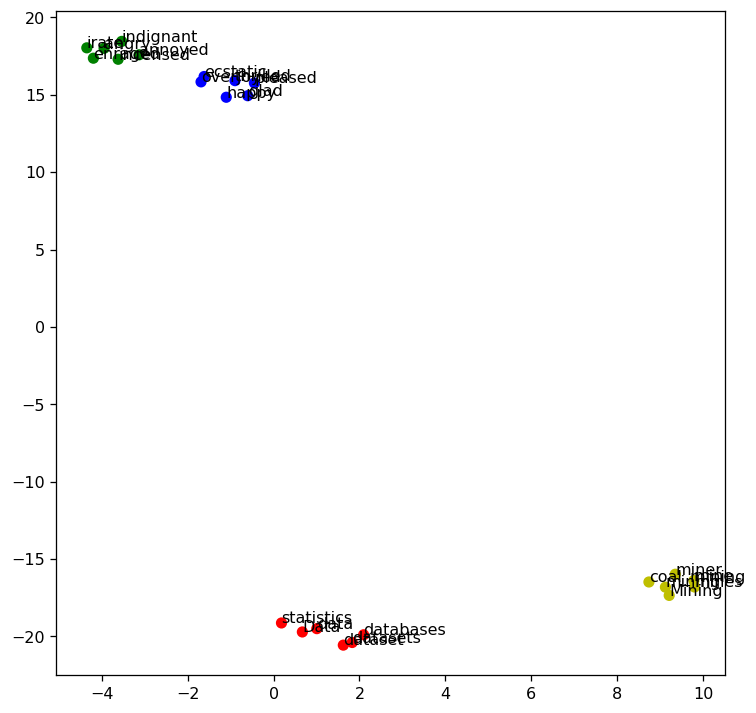

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

(260, 300)
60
(224, 2)


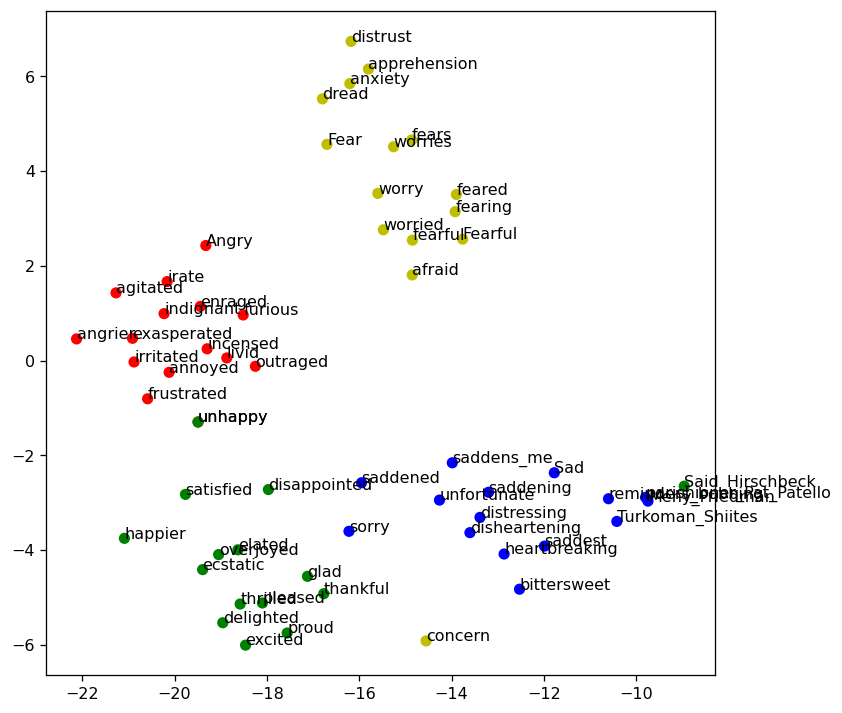

In [91]:
# Answer here

# Find nearest 15 words to 'angry', 'happy', 'sad', 'fear'
topn = 15
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)] 

# Specify target words and colors
target_words = angry_words + happy_words + sad_words + fear_words

# Adds color to the clusters
cn = topn
color = ['r'] * cn + ['g'] * cn + ['b'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

# Extract vectors for the selected words
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
print(X_train.shape)
print(target_size)

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
print(X_tsne.shape)

# Training
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()


### Conclusion
In this plot each point is related to the word 'angry', 'happy', 'sad', and 'fear' by there color scheme. There are a total of 60 points, 15 for each related word, 4 different colors. (these specific words are excluded from the plot to ensure the 60 word limit and only wanting 15 words related to the four word)

In general we can say the words with related color are words that similar to the four words we are trying to look at. Which plays a big role in looking at semantics of the words that might not always be easy seen in the data. But some words are unrelated in the clusters.

red ('angry') - The clust is pretty tight with words that relate to angry such as frustrated and irritated, etc. The close cluster just indicates a close resembalance/semantic meaning for the word angry.

green ('happy') - happy cluster has some related words to happy but others not so much. It does have word within the cluster that are related to happy such as delighted, glad, etc. But other words some what near the cluster that doesn't make sense like disappointed and unhappy (can argue it is cluster to the angry cluster and should belong there and not happy cluster). We also have what appears to be two words that is unrelated to any cluster but still part of happy (looks to be noise/outlier), "Said, Hirschbeck". The happy cluster seems to be limited to 12 actual words that relate to it and anything after that will cause issues when training a model.

blue ('sad') - Sad cluster seems to be a good tight cluster, but just like happy cluster, it has some words in there that doesn't make senese, such as "Turkoman_Shiites", which means the current sad cluster has limited data where if it passes a threshold it starts grabbing random words that are close by related words, not necessary semantically similar.

yellow ('fear') - Just like angry it has a good cluster where all words (points) are related to the word fear, where there are good semantics for a model to train on.

---

# Second Part - Kaggle Ranking
![pic0](pics/pic0.png)

---

# Third Part - Kaggle Code and explanation

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import emoji
import demoji
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from gensim.models import Word2Vec
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
emotions = pd.read_csv('emotion.csv')
identify = pd.read_csv('data_identification.csv')

import json

with open('tweets_DM.json', 'r') as file:
    data_list = [json.loads(line) for line in file]

## Preprocessing / Data Preparation

In [ ]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Flatten the nested '_source' field
df_source = pd.json_normalize(df['_source'])

# Extract the desired columns from the nested 'tweet' field
df_tweet = df_source[['tweet.hashtags', 'tweet.tweet_id', 'tweet.text']]

# Rename the columns for clarity
df_tweet.columns = ['hashtags', 'tweet_id', 'text']

# Convert lists in the 'hashtags' column to strings
df_tweet['hashtags'] = df_tweet['hashtags'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Add the extracted columns to the original DataFrame
df = pd.concat([df, df_tweet], axis=1)

# Drop the original '_source' column
df = df.drop(columns='_source')

In [ ]:
# Merge DataFrames based on 'tweet_id'
merged_df = pd.merge(df, identify, on='tweet_id', how='inner')

# Dropping unecessary columns that won't matter for emotions
dropC = ['_score', '_index', '_crawldate', '_type']
merged_df.drop(columns=dropC, inplace=True)

# Merge text and hashtags
merged_df['combined'] = merged_df['text'] + ' ' + merged_df['hashtags']

# Drop the 'text' and 'hashtags' columns
merged_df.drop(['text', 'hashtags'], axis=1, inplace=True)

In [ ]:
# Function to remove emojis from a text
def remove_emojis(text):
    return demoji.replace(text, '')

merged_df['combined'] = merged_df['combined'].apply(remove_emojis)

In [ ]:
# Function to remove symbols from a text
def remove_special_symbols(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '',text)
    return cleaned_text

merged_df['combined'] = merged_df['combined'].apply(remove_special_symbols)

In [ ]:
# Separate data by identification
test = merged_df[merged_df['identification'] == 'test']
train = merged_df[merged_df['identification'] == 'train']

test.drop(['identification'], axis=1, inplace=True)
train.drop(['identification'], axis=1, inplace=True)

In [ ]:
# merge emotions onto train data
train = pd.merge(train, emotions, on='tweet_id', how='inner')

In [ ]:
# Store Id to concat back on later if needed
test_id = test['tweet_id']
train_id = train['tweet_id']

test.drop(['tweet_id'], axis=1, inplace=True)
train.drop(['tweet_id'], axis=1, inplace=True)

In [ ]:
# Split the training dataset to get a subset creating a Sample for testing
train_sample, _ = train_test_split(train, train_size=len(test), stratify=train['emotion'])

## Model Building and Training

In [ ]:
# Parameters
X_train = train['combined']  # 'combine' is the combined text and hashtags
y_train = train['emotion']   # 'emotion' is the target variable in the training set

X_test = test['combined']    # Combined text and hashtags in the test set

## Logistic Regression - OvR

In [ ]:
# Create a pipeline with TF-IDF, StandardScaler, and Logistic Regression (OvR)
model_ovr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', MaxAbsScaler()),
    ('clf', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

# Train the model
model_ovr.fit(X_train, y_train)

# Predict emotions on the test set
y_test_pred_ovr = model_ovr.predict(X_test)

# Display the predicted emotions for the test set
test['emotion_ovr'] = y_test_pred_ovr
print(test[['combined', 'emotion_ovr']])

## Logistic Regression - Multinominal

In [ ]:
# Create a pipeline with TF-IDF, StandardScaler, and Logistic Regression (multinomial)
model_multinomial = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', MaxAbsScaler()),
    ('clf', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Train the model
model_multinomial.fit(X_train, y_train)

# Predict emotions on the test set
y_test_pred_multinomial = model_multinomial.predict(X_test)

# Display the predicted emotions for the test set
test['emotion_multinomial'] = y_test_pred_multinomial
print(test[['combined', 'emotion_multinomial']])

---

## Conclusion

For my code I didn't run it on this jupyter due to having done this on a different computer at the time (rather than my laptop that I normal use, I used computer has better hardware, but I try to keep all work done on laptop as "work" laptop).

For Preprocess/Data Preparation:
I simple cleaned up the data, converted Json file of tweet to a readable file for python to use. From there I cleaned up necessary columns, espeically "source" column which had a list of different columns. I extracted the important information from the source column to be placed in three separate columns. Eventually cleaning up the whole DF where I kept what I thought was important for this task, which was the hashtag and text column (and tweet_ID). I decided to combine the two and treat it as one. From here I can get rid of symbols and emojis as I find those things can skew the model and increase the time it takes to process it. Next I separated the data on which rows are used for training and which are for testing by comparing it with the identification from the data_identification file. On the train data set I can add emotions from the emotion data set. I removed tweet_ID since it is no longer (only needing to save the test tweet_id for submission purpose). From there I have my two data sets to build my models. I also made a smaller sample size from train data with same size as test (due to large train data set size) for future use.

Models: This comes to be a classification problem where supervised learning is better suited (due to already having emotion labels in train). I tested a model with LDA at first (even if it was used as unsupervied) to test out the submission process. Next I tried out SVM (SRC), but I found this model was taking too long to train (days on laptop) which never finished. I switched Logistic Regression for my model training as it is fast with large data sets. I tested different multi class approaches OvR (One-vs-Rest) and multinominal. OvR was faster, but multinominal was better when it came to classifying emotions. But it was only a 2% increase. I also tested on different iterations, but between 1000 and 10000 there was no change, just increased of time. I also testest with the sample data set I created it had an accuracy 2% lower than test the whole train data set. This didn't matter though since Logistic Regression can train fairly quick. Aditional two testing the models I used a pipeline which help encapsulate the different process, such as using TFidf and scalar(feature engineering) with the model training. I also tested word2vec, but it was ineffective and I think my approach was wrong it, (kept getting 'joy' for all rows).

Things I wished I done more of/could do better:
I end up losing a lot of time on SVM model, and underestime the time it would take to build these models. I wish I started on the lab right away then Kaggle competition. I think I could of done a lot more on feature engineering. Maybe putting my important on certain hashtag words or words that could be identified in the text. Maybe I could of done vector sentences which would have help significantly when it came identifying the emotions. I could have tried other models like decision tree or even unsupervised style training through clusters. I also think I could had add ways to evaluate my models, rather than abusing the system to do it for me. Another thing I wanted to do, is try handle emotecons and symbols and create a category for them or at least try different models that can handle them.In short I underestime the time it took to train models and if I started sooner I could have tried different approaches.

Summary:
Data preparation : cleaned up data, removed unecessary columns, extracted important columns, match columns with important information, comnbined columns, saparated data - ended with only two columns for train and test data sets.
Feature Engineering: TFIDF, Scalar (With help of pipeline)
Models: Logistic Regression OvR and Multinominal. (tested SVM).